In [1]:
#load the libraries
import pandas as pd
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import pandas_profiling as pp
import sweetviz as sv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Startups= pd.read_csv('D:/Data_ Science/50_Startups.csv')
Startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
Startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
Startups.corr()
# With the below data we can say that there is a strong corelation ship exist with R & D Spend and Marketing Spend  to the Profit

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


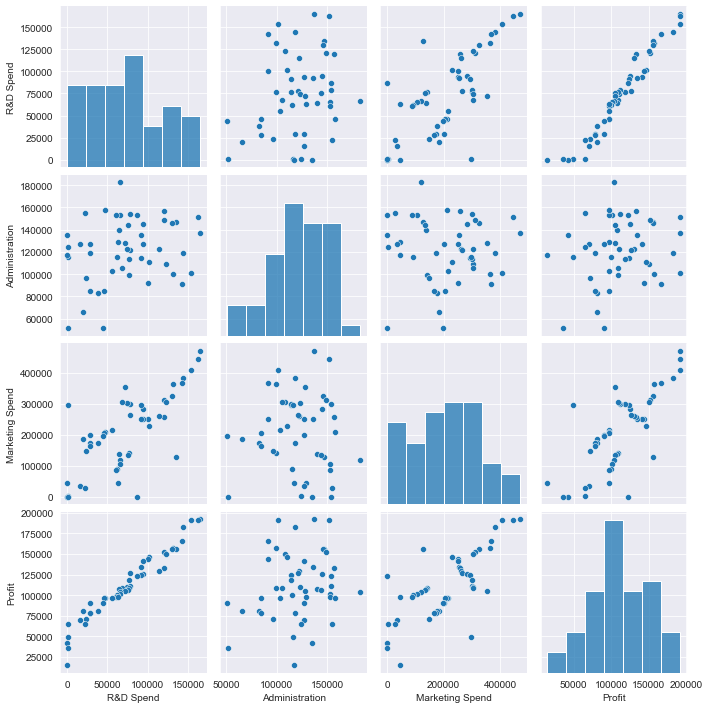

In [5]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(Startups)
#Correlation analysis by using pairplot

In [6]:
#rename the Solar column
Startups1 = Startups.rename({'R&D Spend': 'RD_Spend','Marketing Spend':'Mark_Spend','Administration':'Admin_Spend'}, axis=1)

In [7]:
Startups1

,RD_Spend,Admin_Spend,Mark_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [8]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RD_Spend+Admin_Spend+Mark_Spend',data=Startups1).fit()

In [9]:
#Coefficients
model.params

Intercept      50122.192990
RD_Spend           0.805715
Admin_Spend       -0.026816
Mark_Spend         0.027228
dtype: float64

In [10]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept       7.626218
RD_Spend       17.846374
Admin_Spend    -0.525507
Mark_Spend      1.655077
dtype: float64 
 Intercept      1.057379e-09
RD_Spend       2.634968e-22
Admin_Spend    6.017551e-01
Mark_Spend     1.047168e-01
dtype: float64


In [11]:
model.summary()
# from the below details we can make out that 
#1.from P value it is clear that we can dicard Administration Spend as it is exhibiting collinearity
#2.As the R-squared and Adj R- squared values are almost same the data is significant and we do not have much outliers in the data set 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Thu, 23 Dec 2021   Prob (F-statistic):           4.53e-30
Time:                        06:46:04   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend        0.8057      0.045     17.846      0.000       0.715       0.897
Admin_Spend    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Mark_Spend      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [13]:
#Calculating VIF
#model = smf.ols('Profit~RD_Spend+Admin_Spend+Mark_Spend',data=Startups1).fit()

In [14]:
rsq_MS = smf.ols('Mark_Spend~RD_Spend+Admin_Spend',data=Startups1).fit().rsquared  
vif_MS = 1/(1-rsq_MS) 

rsq_RD = smf.ols('RD_Spend~Admin_Spend+Mark_Spend',data=Startups1).fit().rsquared  
vif_RD = 1/(1-rsq_RD) 

rsq_AS = smf.ols('Admin_Spend~RD_Spend+Mark_Spend',data=Startups1).fit().rsquared  
vif_AS = 1/(1-rsq_AS) 

# Storing vif values in a data frame
d1 = {'Variables':['Admin_Spend','RD_Spend','Mark_Spend'],'VIF':[vif_MS,vif_RD,vif_AS]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,Admin_Spend,2.326773
1,RD_Spend,2.468903
2,Mark_Spend,1.175091


In [15]:
# As VIF is less than 10 for all the variables we can say that the collinearity does not exist between the x varibales of the data set 

# Residual Analysis
#Test for Normality of Residuals(Q-Q Plot)

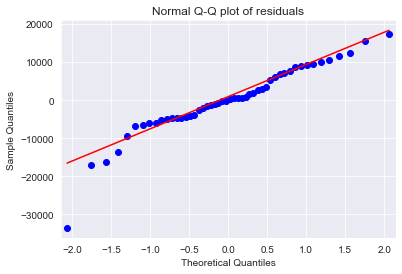

In [16]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [17]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

# Residual Plot for Homoscedasticity

In [18]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

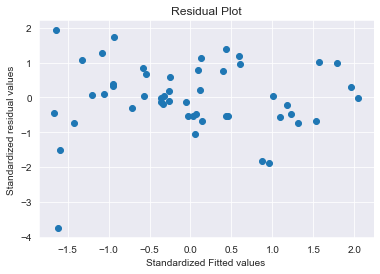

In [19]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

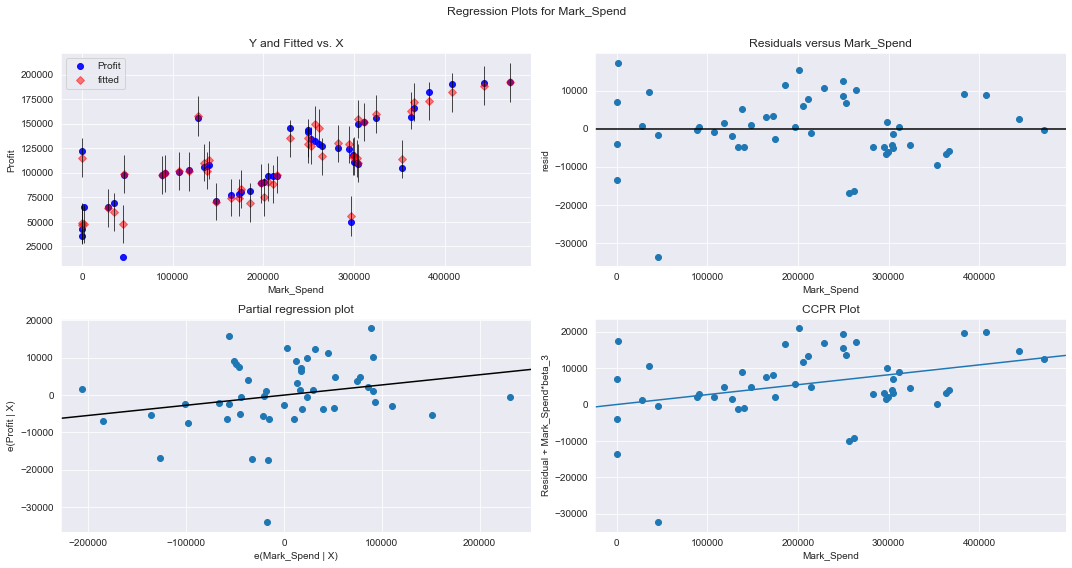

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Mark_Spend", fig=fig)
plt.show()

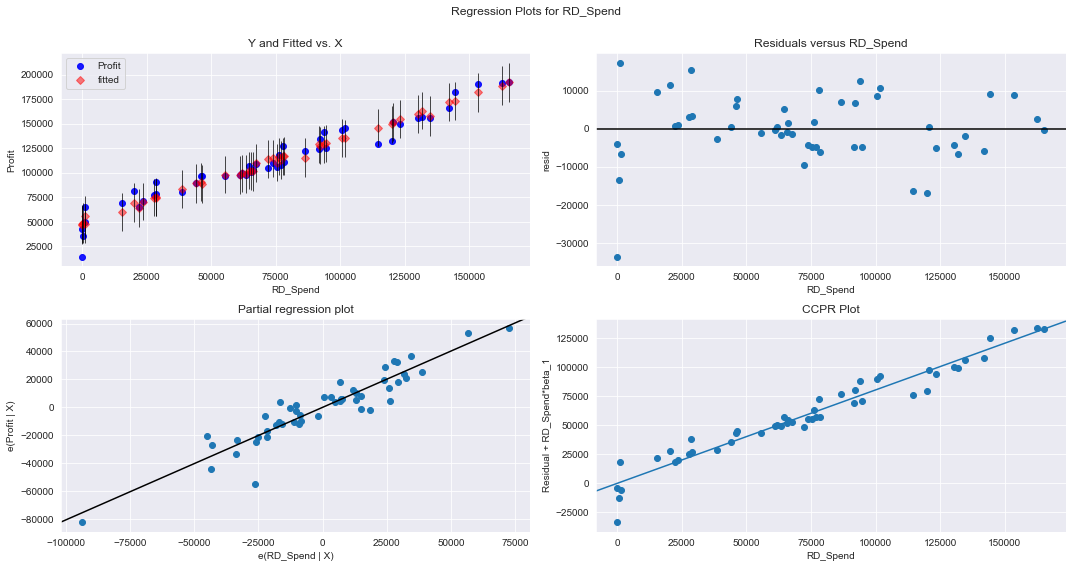

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_Spend", fig=fig)
plt.show()

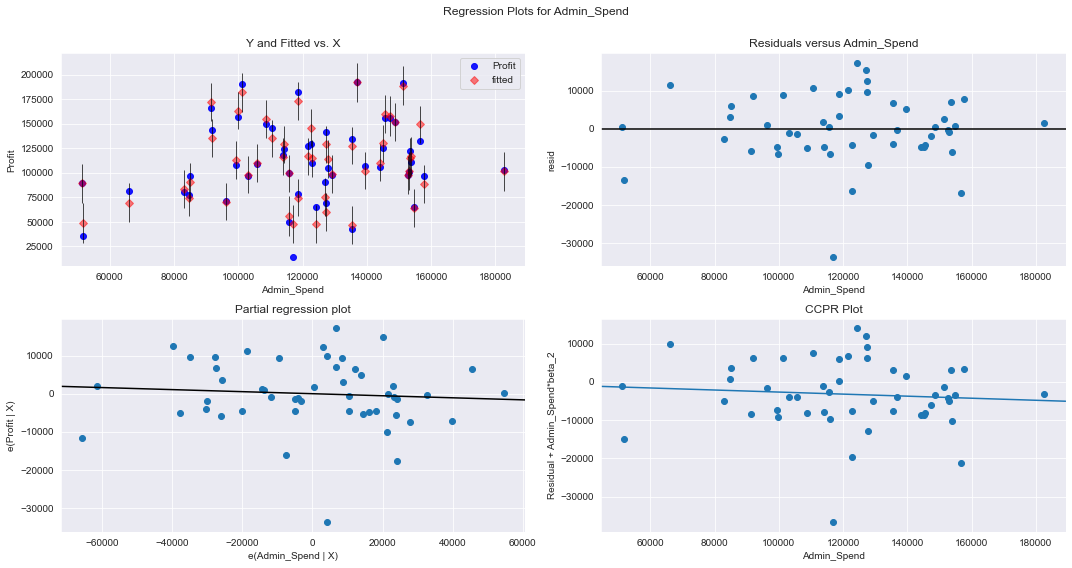

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admin_Spend", fig=fig)
plt.show()

# Model Deletion Diagnostics
Detecting Influencers/Outliers

# Cook's Distance 

In [23]:
#we want to store only one data point that to as only c
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [24]:
help(model.get_influence())

Help on OLSInfluence in module statsmodels.stats.outliers_influence object:

class OLSInfluence(_BaseInfluenceMixin)
 |  OLSInfluence(results)
 |  
 |  class to calculate outlier and influence measures for OLS result
 |  
 |  Parameters
 |  ----------
 |  results : RegressionResults
 |      currently assumes the results are from an OLS regression
 |  
 |  Notes
 |  -----
 |  One part of the results can be calculated without any auxiliary regression
 |  (some of which have the `_internal` postfix in the name. Other statistics
 |  require leave-one-observation-out (LOOO) auxiliary regression, and will be
 |  slower (mainly results with `_external` postfix in the name).
 |  The auxiliary LOOO regression only the required results are stored.
 |  
 |  Using the LOO measures is currently only recommended if the data set
 |  is not too large. One possible approach for LOOO measures would be to
 |  identify possible problem observations with the _internal measures, and
 |  then run the leave-o

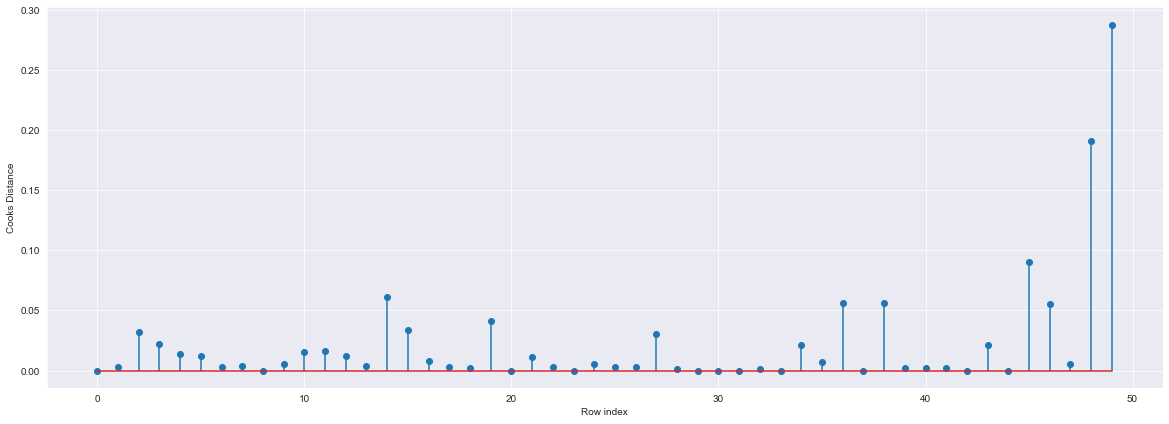

In [25]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Startups1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

# High Influence points

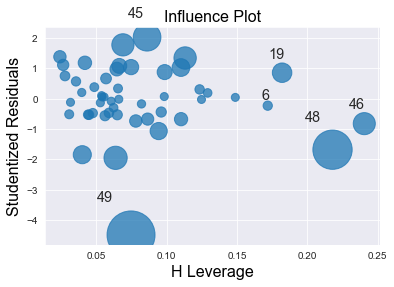

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [28]:
k = Startups1.shape[1]
n = Startups1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

# from the above data point we can say that 49,48,46,45,38,36,19,15,14 are influencers

In [29]:
Startups1[Startups.index.isin([49,48,46,45,38,19,15,14])]

,RD_Spend,Admin_Spend,Mark_Spend,State,Profit
14,119943.24,156547.42,256512.92,Florida,132602.65
15,114523.61,122616.84,261776.23,New York,129917.04
19,86419.70,153514.11,0.00,New York,122776.86
38,20229.59,65947.93,185265.10,New York,81229.06
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# Improving the model 

In [30]:
Startups2 = pd.read_csv('D:/Jashwini/Excelr/50_Startups.csv')

In [31]:
#Discard the data points which are influencers and reasign the row number (reset_index())
Startups_new=Startups2.drop(Startups2.index[[49,48,46,45,38,19,15,14]],axis=0).reset_index()

In [32]:
#Drop the original index
Startups_new=Startups_new.drop(['index'],axis=1)

In [33]:
Startups_new

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [34]:
#rename the Solar column
Startups_new2 = Startups_new.rename({'R&D Spend': 'RD_Spend','Marketing Spend':'Mark_Spend','Administration':'Admin_Spend'}, axis=1)

# Build a model 

In [35]:
#Generate R-Squared and AIC values
final_ml_V= smf.ols('Profit~RD_Spend+Admin_Spend+Mark_Spend',data = Startups_new2).fit()

In [36]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9733795742049028, 856.3690024909556)

# Cook’s Distance

In [37]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

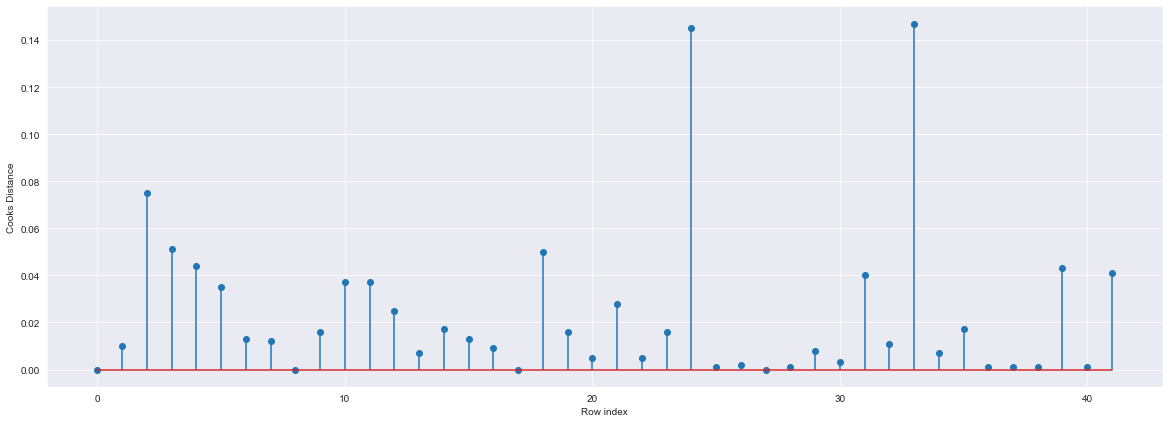

In [38]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Startups_new2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [39]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(33, 0.14672620178318274)

In [40]:
#Drop 33,24,2,3,4,18,31,39,41 observations
Startups_new3=Startups_new2.drop(Startups_new2.index[[33,24,2,3,4,18,31,39,41]],axis=0).reset_index()

In [41]:
Startups_new3

,index,RD_Spend,Admin_Spend,Mark_Spend,State,Profit
0,0,165349.20,136897.80,471784.10,New York,192261.83
1,1,162597.70,151377.59,443898.53,California,191792.06
2,5,131876.90,99814.71,362861.36,New York,156991.12
3,6,134615.46,147198.87,127716.82,California,156122.51
4,7,130298.13,145530.06,323876.68,Florida,155752.60
5,8,120542.52,148718.95,311613.29,New York,152211.77
6,9,123334.88,108679.17,304981.62,California,149759.96
7,10,101913.08,110594.11,229160.95,Florida,146121.95
8,11,100671.96,91790.61,249744.55,California,144259.40
9,12,93863.75,127320.38,249839.44,Florida,141585.52


In [42]:
#Build the model on the new data
final_ml_V= smf.ols('Profit~RD_Spend+Admin_Spend+Mark_Spend',data = Startups_new3).fit()

In [43]:
#Again check for influencers
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

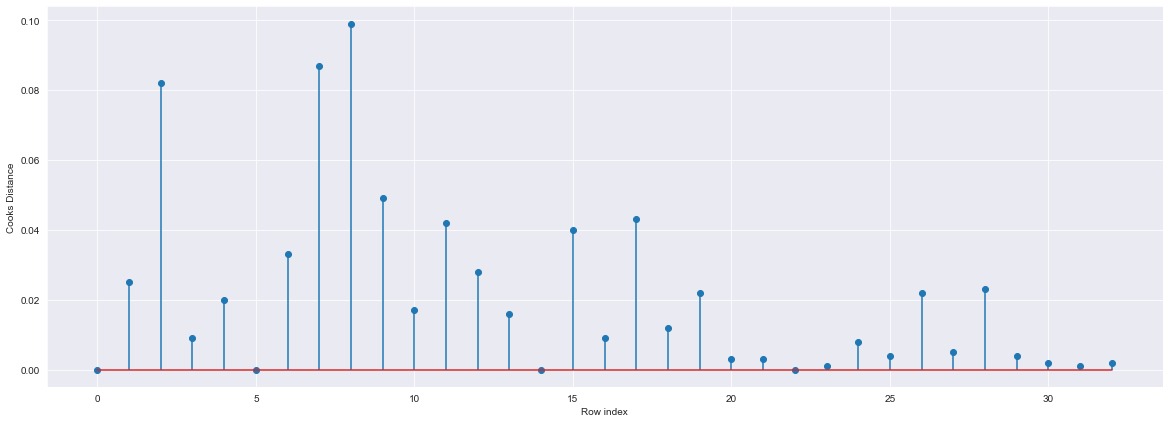

In [44]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(Startups_new3)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [45]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(8, 0.09878786637799739)

#Since the value is <1 , we can stop the diagnostic process and finalize the model

In [46]:
#Check the accuracy of the mode
final_ml_V= smf.ols('Profit~RD_Spend+Admin_Spend+Mark_Spend',data = Startups_new3).fit()

In [47]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9768436623676545, 661.6469311519656)

# Predicting for new data

In [48]:
#New data for prediction
new_data=pd.DataFrame({'RD_Spend':155840,"Admin_Spend":137584,"Mark_Spend":155000,},index=[1])

In [49]:
final_ml_V.predict(new_data)

1    174894.385326
dtype: float64

In [50]:
new_data=pd.DataFrame({'RD_Spend':205840,"Admin_Spend":157584,"Mark_Spend":205000,},index=[1])

In [51]:
final_ml_V.predict(new_data)

1    215067.960601
dtype: float64